In [ ]:
%pip install matplotlib
%pip install seaborn

In [1]:
import collections

import numpy as np
from IPython.display import display, HTML
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
sns.set_style("whitegrid")


In [2]:
UKR_ALPHABET = frozenset(['а', 'б', 'в', 'г', 'ґ', 'д', 'е', 'є', 'ж', 'з', 'и', 'і', 'ї', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ь', 'ю', 'я', ])
UKR_WORD_MODS = frozenset(['-', "'", '’'])
UKR_WORD_PARTS = frozenset(UKR_ALPHABET.union(UKR_WORD_MODS))

def normalize(word):
    return word.replace('’', "'")

def split_ukrainian(text):
    n = len(text)
    end = 0
    while end < n:
        start = end
        while end < n and text[end] in UKR_WORD_PARTS:
            end += 1

        word = text[start:end]
        if word and word not in UKR_WORD_MODS:
            yield normalize(word)
        
        end += 1

In [3]:
def count_words(text):
    return collections.Counter(word for word in split_ukrainian(text))

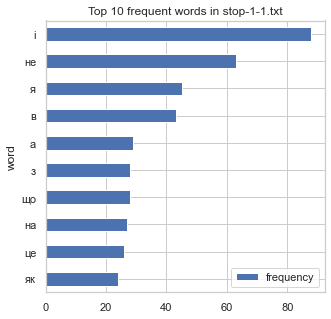

word,frequency
і,88
не,63
я,45
в,43
а,29
що,28
з,28
на,27
це,26
як,24


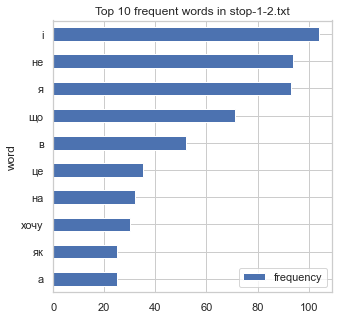

word,frequency
і,104
не,94
я,93
що,71
в,52
це,35
на,32
хочу,30
а,25
як,25


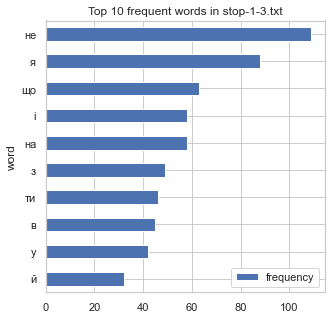

word,frequency
не,109
я,88
що,63
на,58
і,58
з,49
ти,46
в,45
у,42
й,32


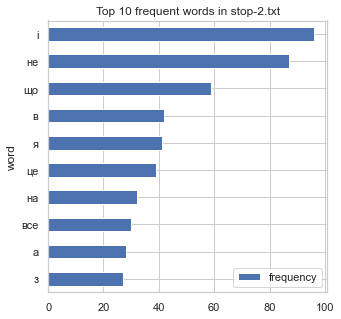

word,frequency
і,96
не,87
що,59
в,42
я,41
це,39
на,32
все,30
а,28
з,27


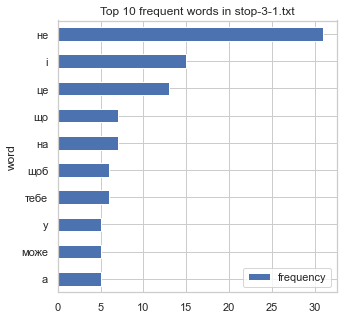

word,frequency
не,31
і,15
це,13
на,7
що,7
тебе,6
щоб,6
а,5
може,5
у,5


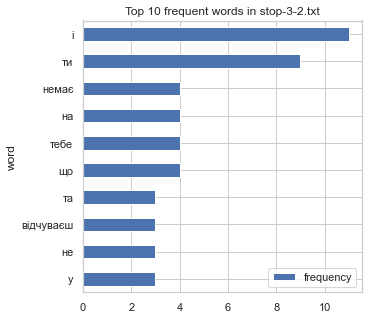

word,frequency
і,11
ти,9
що,4
тебе,4
на,4
немає,4
у,3
не,3
відчуваєш,3
та,3


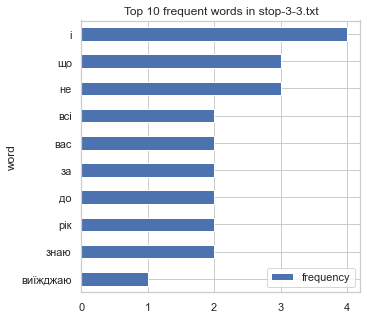

word,frequency
і,4
не,3
що,3
знаю,2
рік,2
до,2
за,2
вас,2
всі,2
виїжджаю,1


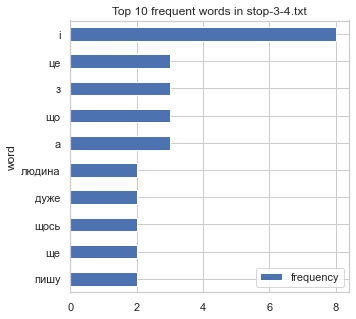

word,frequency
і,8
а,3
що,3
з,3
це,3
пишу,2
ще,2
щось,2
дуже,2
людина,2


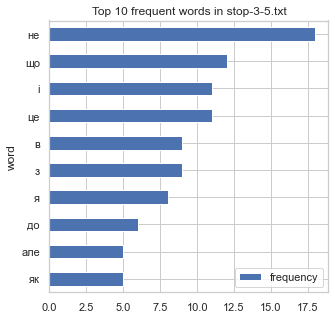

word,frequency
не,18
що,12
це,11
і,11
з,9
в,9
я,8
до,6
як,5
але,5


In [4]:
import os

DATAIDIR = "./data"
files = [file for file in os.listdir(DATAIDIR) if file.endswith(".txt")]
files.sort()

for filename in files:
    display(HTML(f'<h2>{filename}</h2>'))
    with open(f'{DATAIDIR}/{filename}') as f:
        text = f.read().lower()
        data = count_words(text).most_common()

        df = pd.DataFrame(data, columns=['word', 'frequency'])
        
        fig, ax = plt.subplots(figsize=(5, 5))
        df.head(10).sort_values(by='frequency').plot.barh(x='word', y='frequency', ax=ax)
        ax.set_title(f'Top 10 frequent words in {filename}')
        plt.show()
        
        display(HTML(df.to_html(index=False)))

    
    print()